In [198]:
import numpy as np 
import seaborn as sns                            
import matplotlib.pyplot as plt       
import pandas as pd   
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [199]:
data_path = '/content/USA_Housing.csv'

In [200]:
data = pd.read_csv(data_path)

In [201]:
data.info()              # Displaying the column headers, data types etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [202]:
data.describe()           #Some statistics of the data frame

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [203]:
print ("Shape of dataset : {}" .format(data.shape))

Shape of dataset : (5000, 7)


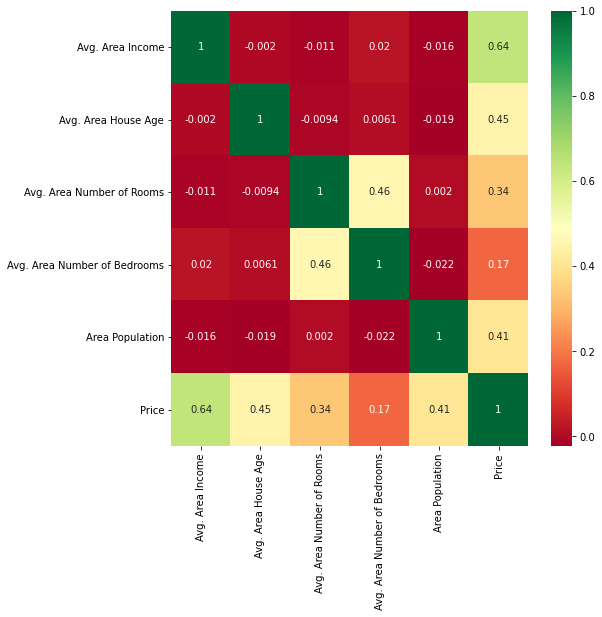

In [204]:
#Displaying the correlation matrix, to find the correlation between the features.
correlation_matrix = data.corr()             
plt.figure(figsize=(8,8))            
sns.heatmap(correlation_matrix,annot=True,cmap="RdYlGn")               

**Price and Avg. Area Income shows relatively high correlation value which is quite expected.**

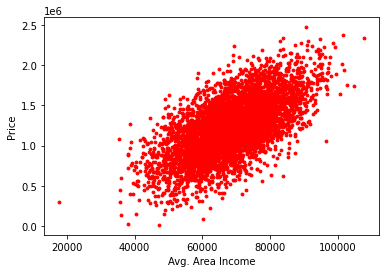

In [205]:
#Plot to observe variation of Price with Avg. Area Income.
figure, ax = plt.subplots()
ax.scatter(x = data['Avg. Area Income'], y = data['Price'],color='red', s=8)
plt.ylabel('Price')
plt.xlabel('Avg. Area Income')
plt.show()

In [206]:
print(data)

      Avg. Area Income  ...                                            Address
0         79545.458574  ...  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1         79248.642455  ...  188 Johnson Views Suite 079\nLake Kathleen, CA...
2         61287.067179  ...  9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3         63345.240046  ...                          USS Barnett\nFPO AP 44820
4         59982.197226  ...                         USNS Raymond\nFPO AE 09386
...                ...  ...                                                ...
4995      60567.944140  ...                   USNS Williams\nFPO AP 30153-7653
4996      78491.275435  ...              PSC 9258, Box 8489\nAPO AA 42991-3352
4997      63390.686886  ...  4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998      68001.331235  ...                          USS Wallace\nFPO AE 73316
4999      65510.581804  ...  37778 George Ridges Apt. 509\nEast Holly, NV 2...

[5000 rows x 7 columns]


In [207]:
data = data.drop('Address',axis=1)                #Droppping the Address column as it doesn't influence the Price

In [208]:
#Printing data after dropping address column
print(data)

      Avg. Area Income  Avg. Area House Age  ...  Area Population         Price
0         79545.458574             5.682861  ...     23086.800503  1.059034e+06
1         79248.642455             6.002900  ...     40173.072174  1.505891e+06
2         61287.067179             5.865890  ...     36882.159400  1.058988e+06
3         63345.240046             7.188236  ...     34310.242831  1.260617e+06
4         59982.197226             5.040555  ...     26354.109472  6.309435e+05
...                ...                  ...  ...              ...           ...
4995      60567.944140             7.830362  ...     22837.361035  1.060194e+06
4996      78491.275435             6.999135  ...     25616.115489  1.482618e+06
4997      63390.686886             7.250591  ...     33266.145490  1.030730e+06
4998      68001.331235             5.534388  ...     42625.620156  1.198657e+06
4999      65510.581804             5.992305  ...     46501.283803  1.298950e+06

[5000 rows x 6 columns]


In [209]:
#Separating data frame into feature matrix and labels 

y = data['Price']
X = data.drop('Price',axis=1)

In [210]:
# apply normalization techniques
for column in X.columns:
	X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())	

# view normalized data
print(X)

      Avg. Area Income  ...  Area Population
0             0.686822  ...         0.329942
1             0.683521  ...         0.575968
2             0.483737  ...         0.528582
3             0.506630  ...         0.491549
4             0.469223  ...         0.376988
...                ...  ...              ...
4995          0.475738  ...         0.326351
4996          0.675097  ...         0.366362
4997          0.507135  ...         0.476515
4998          0.558419  ...         0.611282
4999          0.530715  ...         0.667088

[5000 rows x 5 columns]


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [212]:
print ("Shape of X_train : {}" .format(X_train.shape))
print ("Shape of y_train : {}" .format(y_train.shape))

Shape of X_train : (4000, 5)
Shape of y_train : (4000,)


In [213]:
print ("Shape of X_test : {}" .format(X_test.shape))
print ("Shape of y_test : {}" .format(y_test.shape))

Shape of X_test : (1000, 5)
Shape of y_test : (1000,)


#Linear Regression

In [214]:
modelLinearReg = LinearRegression()

modelLinearReg_CV = GridSearchCV(modelLinearReg, param_grid = {}, cv = 2)   
modelLinearReg_CV.fit(X_train, y_train)                                           

GridSearchCV(cv=2, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [215]:
error = cross_validate(modelLinearReg_CV, X_train, y_train, scoring = {'mean_squared_error' : make_scorer(mean_squared_error)}, cv = 2)

In [216]:
MSE_error = sum(error['test_mean_squared_error'])/len(error['test_mean_squared_error'])

In [217]:
print('MSE error for Linear Regression: ', MSE_error)

MSE error for Linear Regression:  10109052057.594055


In [218]:
y_pred = modelLinearReg_CV.predict(X_test)

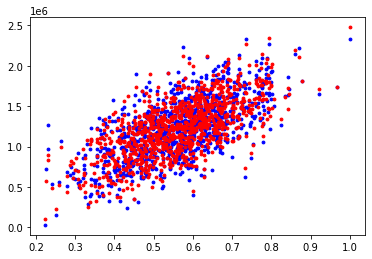

In [219]:
#Plotting y_test vs Avg. Area Income
plt.scatter(X_test['Avg. Area Income'], y_test, color='blue',s=8)
plt.scatter( X_test['Avg. Area Income'], y_pred, color='red',s=8)

**It can be observed that the predicted price points clusters makes similar kind of patterns like the actual price points.**

#Ridge Regression

In [220]:
modelRidgeReg = Ridge()
params = [0.000001, 0.0001, 0.001, 0.01, 0.05, 0.1,  0.1, 0.2,0.5, 1,2, 5, 10, 50, 100]

modelRidgeReg_CV = GridSearchCV(modelRidgeReg, param_grid={'alpha':params}, cv = 2) 
  
modelRidgeReg_CV.fit(X_train, y_train)
  
error = cross_validate(modelRidgeReg_CV, X_train, y_train, scoring = {'mean_squared_error' : make_scorer(mean_squared_error)}, cv = 2)

In [221]:
MSE_error = sum(error['test_mean_squared_error'])/len(error['test_mean_squared_error'])

In [222]:
print('MSE error for Ridge Regression: ', MSE_error)

MSE error for Ridge Regression:  10109807936.54826


In [223]:
y_pred = modelRidgeReg_CV.predict(X_test)

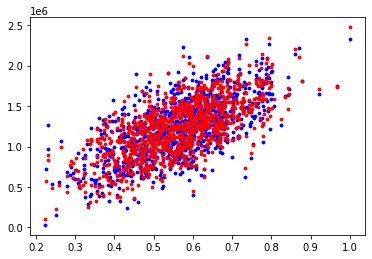

In [224]:
#Plotting y_test vs Avg. Area Income
plt.scatter(X_test['Avg. Area Income'], y_test, color='blue',s=8)
plt.scatter( X_test['Avg. Area Income'], y_pred, color='red',s=8)